# Practica de regresion con modelos de machine learning

En este notebook implementaremos:
  1. Support vector regressor
  2. Decision trees

Variables del dataset:
  - mpg - Miles per Gallon
  - cyl - # of cylinders
  - disp - displacement, in cubic inches
  - hp - horsepower
  - drat - driveshaft ratio 
  - wt - weight
  - qsec - 1/4 mile time; a measure of acceleration
  - vs - 'V' or straight - engine shape
  - am - transmission; auto or manual
  - gear - # of gears
  - carb - # of carburetors.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statsmodels.api as sm


In [2]:
!wget https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv

--2022-09-05 23:33:48--  https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1700 (1.7K) [text/plain]
Saving to: ‘mtcars.csv’

mtcars.csv          100%[===================>]   1.66K  --.-KB/s    in 0s      

2022-09-05 23:33:48 (32.2 MB/s) - ‘mtcars.csv’ saved [1700/1700]



In [6]:
cars = pd.read_csv('mtcars.csv')


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [13]:
from scipy.stats import shapiro
for i in cars.drop(columns='model'):
  print(i, '->', shapiro(cars[i]))

mpg -> ShapiroResult(statistic=0.9475647211074829, pvalue=0.12288112193346024)
cyl -> ShapiroResult(statistic=0.7533102035522461, pvalue=6.058378858142532e-06)
disp -> ShapiroResult(statistic=0.9200125932693481, pvalue=0.020806478336453438)
hp -> ShapiroResult(statistic=0.933418869972229, pvalue=0.0488068051636219)
drat -> ShapiroResult(statistic=0.9458838701248169, pvalue=0.11006041616201401)
wt -> ShapiroResult(statistic=0.9432578682899475, pvalue=0.09265592694282532)
qsec -> ShapiroResult(statistic=0.9732511639595032, pvalue=0.5935246348381042)
vs -> ShapiroResult(statistic=0.6322636604309082, pvalue=9.737414785604415e-08)
am -> ShapiroResult(statistic=0.6250743865966797, pvalue=7.836341353595344e-08)
gear -> ShapiroResult(statistic=0.7727859020233154, pvalue=1.3068596672383137e-05)
carb -> ShapiroResult(statistic=0.8510971069335938, pvalue=0.00043823738815262914)


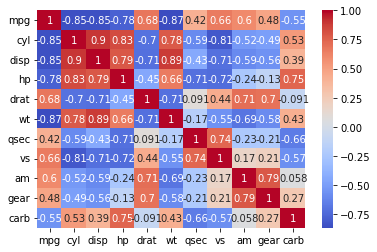

In [15]:
sns.heatmap(cars.drop(columns='model').corr(), cmap='coolwarm', annot=True) # Por Pearson


Nota: La correlacion no **implica** casualidad

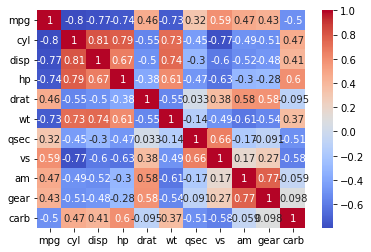

In [16]:
sns.heatmap(cars.drop(columns='model').corr(method='kendall'), cmap='coolwarm', annot=True) # Por Kendall


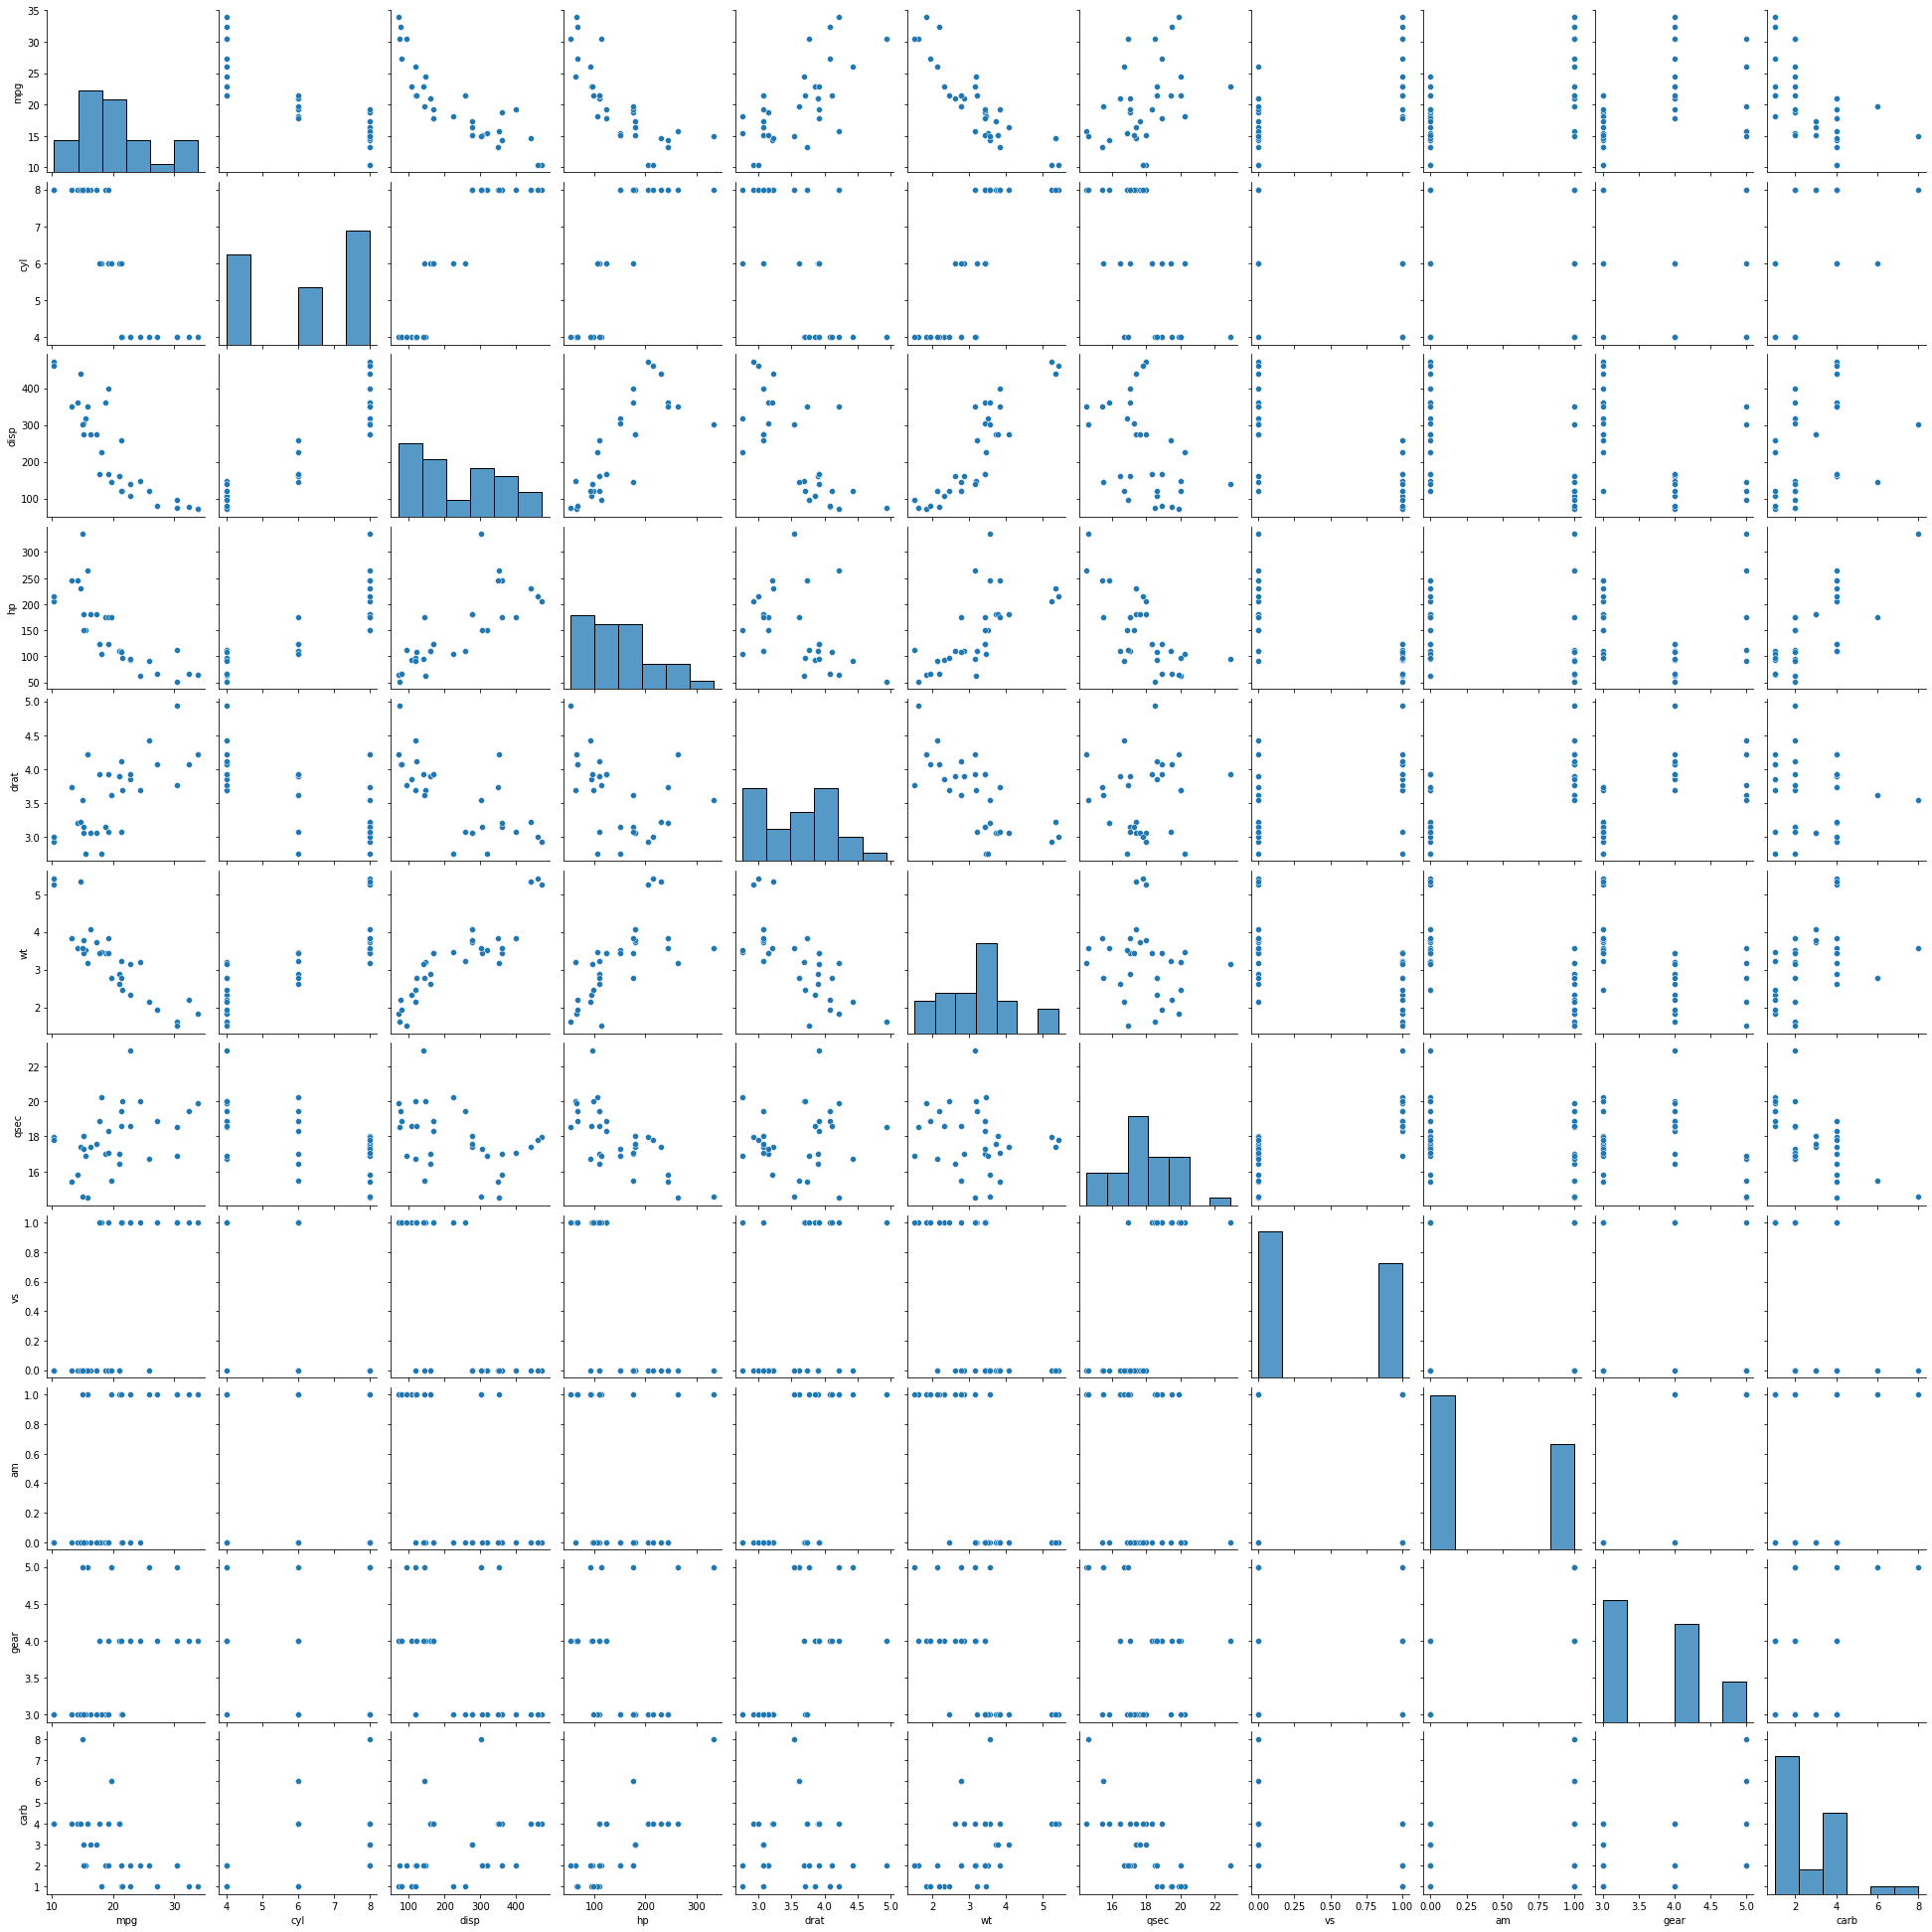

In [19]:
sns.pairplot(cars.drop(columns='model'));# El parametro corner=False

# 1.Modelo de regresion lineal multiple con OLS /minimos cuardados ordinarios 

In [21]:
X = cars[['hp', 'wt', 'disp']].to_numpy()
y = cars['mpg'].to_numpy()

In [27]:
ols_model = sm.OLS(y, X).fit()


In [28]:
ols_model.params

array([ 0.04382227, 12.06390563, -0.11686153])

In [29]:
ols_model.rsquared_adj

0.8155768504930017

In [31]:
ols_model.aic


234.25628315660344

In [32]:
ols_model.bic

238.65349086500262

In [35]:
X = cars[['hp','wt','disp','qsec']].to_numpy()
y = cars['mpg'].to_numpy()
ols_model = sm.OLS(y,X).fit()
ols_model.rsquared_adj,ols_model.aic,ols_model.bic

(0.9792917578381581, 165.15892732976795, 171.02187094096686)

In [37]:
from sklearn.svm import SVR
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
  svr = SVR(kernel='rbf', C=i, epsilon=0.8)
  svr.fit(X, y)
  print(f"R2 con parametro C={i}, score={svr.score(X, y)}")

R2 con parametro C=0.5, score=0.4375336230297616
R2 con parametro C=1, score=0.5949818271572074
R2 con parametro C=2, score=0.6876373754407803
R2 con parametro C=3, score=0.7313194207279836
R2 con parametro C=4, score=0.7600842130789636
R2 con parametro C=5, score=0.7792819447449824
R2 con parametro C=6, score=0.786125046074801
R2 con parametro C=7, score=0.79112417322503
R2 con parametro C=8, score=0.7983732913040711
R2 con parametro C=9, score=0.8125330451501601
R2 con parametro C=10, score=0.8340314499541484


In [52]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X,y)
print(f"R2 score de Decision Tree: {dtree.score(X, y)}")


R2 score de Decision Tree: 1.0


In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

In [54]:
dtree = DecisionTreeRegressor()
dtree.fit(xtrain, ytrain)
print(f"R2 score de Decision Tree en entrenamiento: {dtree.score(xtrain, ytrain)}")
print(f"R2 score de Decision Tree en testeo: {dtree.score(xtest, ytest)}")

R2 score de Decision Tree en entrenamiento: 1.0
R2 score de Decision Tree en testeo: 0.7034407544426151


Cuando existe varianza significativa entre las metricas de entrenamiento y testeo, significa que hay overfitting

In [56]:
from sklearn import tree
print(tree.export_text(dtree))

|--- feature_0 <= 118.00
|   |--- feature_2 <= 107.60
|   |   |--- feature_2 <= 73.40
|   |   |   |--- value: [33.90]
|   |   |--- feature_2 >  73.40
|   |   |   |--- feature_3 <= 18.71
|   |   |   |   |--- value: [30.40]
|   |   |   |--- feature_3 >  18.71
|   |   |   |   |--- value: [27.30]
|   |--- feature_2 >  107.60
|   |   |--- feature_0 <= 93.00
|   |   |   |--- feature_2 <= 133.50
|   |   |   |   |--- value: [26.00]
|   |   |   |--- feature_2 >  133.50
|   |   |   |   |--- value: [24.40]
|   |   |--- feature_0 >  93.00
|   |   |   |--- feature_0 <= 96.00
|   |   |   |   |--- value: [22.80]
|   |   |   |--- feature_0 >  96.00
|   |   |   |   |--- feature_3 <= 18.23
|   |   |   |   |   |--- value: [21.00]
|   |   |   |   |--- feature_3 >  18.23
|   |   |   |   |   |--- feature_1 <= 2.84
|   |   |   |   |   |   |--- value: [21.50]
|   |   |   |   |   |--- feature_1 >  2.84
|   |   |   |   |   |   |--- value: [21.40]
|--- feature_0 >  118.00
|   |--- feature_0 <= 192.50
|   |   |--